In [228]:
import pandas as pd
from pylab import *     ####imports matplotlib and numpy module in single command
import seaborn as sns
%matplotlib inline      
#we also have an option of notebook which opens your graph in seperate GUI window

### Importing dataset

In [261]:
df=pd.read_excel('adult_dataset.xlsx',na_values=['NULL'])

In [262]:
df.drop('Fnlwgt',inplace=True,axis=1)  
#we dropped it because it is for machine learning and currently no one in our group is that sophisticated

In [263]:
df     #as we have 48K instances

,Age,Workclass,Education,Educational_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,Native_Country,Income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Level_1 - Displaying the details of general queries

### Q1. Describe your dataset

In [ ]:
df.describe()

### Q2. Find dtypes of all the attributes in your dataset

In [ ]:
df.dtypes

### Q3. Describe your dataset using categorical attributes 

In [ ]:
df[['Workclass','Education','Marital_Status','Occupation','Relationship','Race','Native_Country']].describe()

### Q4. Give complete information of your dataset.

In [ ]:
df.info()

### Q5. Select all the employees working in Private class and earning more than 50K

In [ ]:
df.query("Workclass=='Private' & Income=='>50K'")

### Q6. Select employees who are Not_Married and their age less than 25 with a Masters education and earn more than 50K.

In [ ]:
df.query("Marital_Status=='Never-married' & Age<=25 & Education=='Masters' & Income=='>50K'")

### Q7. Select employees whose age is 66+ and is working in any Government-organisation.

In [264]:
df.Workclass.unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [265]:
df.query("Age>66 & (Workclass=='Local-gov' | Workclass=='Federal-gov' | Workclass=='State-gov')")

,Age,Workclass,Education,Educational_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,Native_Country,Income
207,73,Local-gov,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,20,United-States,<=50K
603,67,State-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1115,71,Federal-gov,10th,6,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
1174,74,Local-gov,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
1479,67,Local-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,24,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47470,67,State-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,41,United-States,>50K
47761,69,State-gov,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,20,United-States,<=50K
47938,67,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,35,United-States,<=50K
48124,67,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,<=50K


##### They are 66+ in age and are working for government. We conclude that the US doesn't have retirement policy.

### Q8. Pair the Education-level with Educational-Num.

In [266]:
education=list(df['Education'].unique())
education_no=list(df['Educational_Num'].unique())
list(zip(education,education_no))

[('11th', 7),
 ('HS-grad', 9),
 ('Assoc-acdm', 12),
 ('Some-college', 10),
 ('10th', 6),
 ('Prof-school', 15),
 ('7th-8th', 4),
 ('Bachelors', 13),
 ('Masters', 14),
 ('Doctorate', 16),
 ('5th-6th', 3),
 ('Assoc-voc', 11),
 ('9th', 5),
 ('12th', 8),
 ('1st-4th', 2),
 ('Preschool', 1)]

### Inference: Based on numbers, Preschool is treated as lowest level of education and Doctorate is treated as highest level of education

### Q9. Insert a seperate column beside Marital_Status denoting number alloted to that particular status.

In [267]:
status_code=pd.factorize(df['Marital_Status'])[0]  #it will allot a number to all distinct values and it starts from 0
df.insert(5,'Status_Number',status_code)
df.head()

,Age,Workclass,Education,Educational_Num,Marital_Status,Status_Number,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,Native_Country,Income
0,25,Private,11th,7,Never-married,0,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,1,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,1,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,0,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Q10. Find relation between Race and Marital_Status of your dataset.

In [268]:
t=pd.crosstab(df.Race,df['Marital_Status'])
t

Marital_Status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
Race,,,,,,,
Amer-Indian-Eskimo,90,0,168,12,163,17,20
Asian-Pac-Islander,108,1,737,64,544,26,39
Black,709,3,1263,89,2032,396,193
Other,42,0,157,17,160,21,9
White,5684,33,20054,446,13218,1070,1257


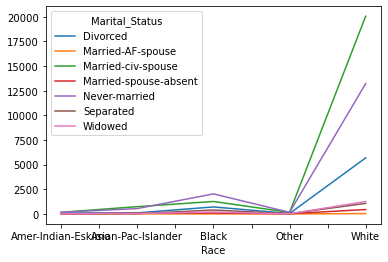

In [269]:
t.plot.line()

### Q11. Plot bargraph using Occupation and Age.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

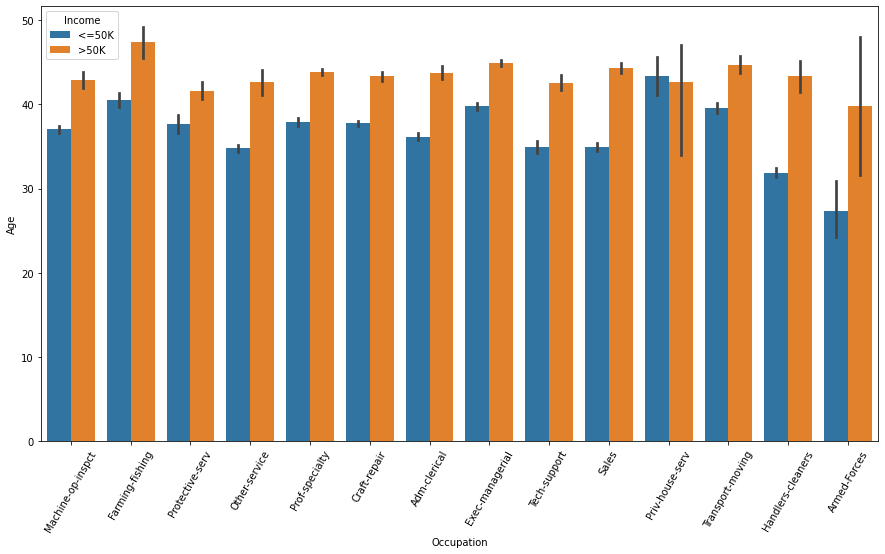

In [270]:
plt.figure(figsize=(15,8))
sns.barplot(x='Occupation',y='Age',data=df,hue='Income')
plt.xticks(rotation=60)

#### Average age is shown in each occupation

### Q12. Plot a graph of number of people present in each race

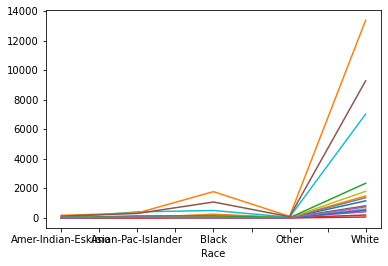

In [271]:
g=pd.crosstab(df.Race,df.Education)
g.plot.line(legend=False)

### Q13. People who are working more than 40 HoursPerWeek(HPW)

In [272]:
df.query("HoursPerWeek>40").HoursPerWeek.count()

14352

In [273]:
df.query("HoursPerWeek>40 & Income=='<=50K'").head()

,Age,Workclass,Education,Educational_Num,Marital_Status,Status_Number,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,Native_Country,Income
1,38,Private,HS-grad,9,Married-civ-spouse,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
23,25,Private,Bachelors,13,Never-married,0,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K
27,23,Private,HS-grad,9,Separated,4,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K
29,32,Self-emp-not-inc,Some-college,10,Never-married,0,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K
31,56,Self-emp-not-inc,11th,7,Widowed,2,Other-service,Unmarried,White,Female,0,0,50,United-States,<=50K


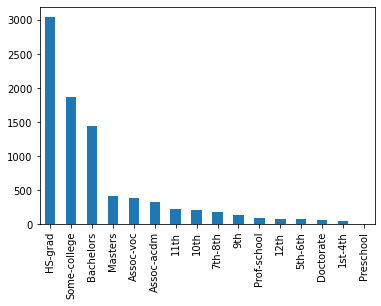

In [277]:
g=df.query("HoursPerWeek>40 & Income=='<=50K'").Education.value_counts()
g.plot.bar()

##### Here we observe that more working hours doesn't mean more money and neither do more education, as Doctorates are only 69 and HS-grads are leading.

### Q14. Check the relation between country and income and taking percentage make a comparison 

In [278]:
y2=pd.crosstab(df['Native_Country'],df['Income'],margins=True)
y2['<=50K%']=(y2['<=50K']/y2['All'])*100
y2['>50K%']=(y2['>50K']/y2['All'])*100
y2.head()

Income,<=50K,>50K,All,<=50K%,>50K%
Native_Country,,,,,
Cambodia,19,9,28,67.857143,32.142857
Canada,119,63,182,65.384615,34.615385
China,86,36,122,70.491803,29.508197
Columbia,81,4,85,95.294118,4.705882
Cuba,104,34,138,75.362319,24.637681


### Q15. Find the most common education for each education level

In [276]:
occed=pd.crosstab(df['Occupation'],df['Education'])
occed.idxmax(axis=0)

Education
10th             Other-service
11th             Other-service
12th             Other-service
1st-4th          Other-service
5th-6th          Other-service
7th-8th           Craft-repair
9th               Craft-repair
Assoc-acdm        Adm-clerical
Assoc-voc         Craft-repair
Bachelors       Prof-specialty
Doctorate       Prof-specialty
HS-grad           Craft-repair
Masters         Prof-specialty
Preschool        Other-service
Prof-school     Prof-specialty
Some-college      Adm-clerical
dtype: object

### Inference: As education level of individual increases, their occupation becomes more specialized

# Level_2: Questions with plotting

### Q16. Show those employees who have either experienced Capital_gain or Capital_loss. 

In [ ]:
df.query("Capital_Gain!=0 | Capital_Loss!=0")

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
sns.barplot(x='Capital_Gain',y='Occupation',data=df)
ax2 = fig.add_subplot(1,2,2)
sns.barplot(x='Capital_Loss',y='Occupation',data=df)
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
sns.barplot(x='Capital_Gain',y='Occupation',data=df,hue='Income')
ax2 = fig.add_subplot(1,2,2)
sns.barplot(x='Capital_Loss',y='Occupation',data=df,hue='Income')
plt.tight_layout()

### Q17. Find the relation between occupation and education

In [ ]:
ed=pd.DataFrame(df['Educational_Num'].groupby(df['Occupation']).mean().sort_values())
ed.reset_index(level=0,inplace=True)
ed

In [ ]:
fig_dims=(24,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x='Occupation',y='Educational_Num',data=ed,ax=ax)

### Inference: Exec-managerial and Prof-speciality are topmost which is obvious because these are postions which require lot of knowledge and academic experience

### Q18. Find the relationship between Gender and Income

In [61]:
y1=pd.crosstab(df.Gender,df.Income)
y1z

Income,<=50K,>50K
Gender,,
Female,14423,1769
Male,22732,9918


In [62]:
(9918/df.query("Gender=='Male'").Gender.count())*100    #for Male

30.37672281776417

In [63]:
(1769/df.query("Gender=='Female'").Gender.count())*100     #for Female

10.925148221343873

#### Men have almost 3 times as likely to go over 50k

In [64]:
v1=(1769/9918)
print('%0.3f'% v1)

0.178


##### For every 100 men, earning over 50k, only 18 women reach upto salary of 50k+

### Q19. Group the data with Age and Income 

In [65]:
cuts=pd.cut(df.Age,[17,25,40,66,91],right=True,include_lowest=True)

In [66]:
cuts=pd.cut(df.Age,[17,25,40,66,91],right=True,include_lowest=True)
table=pd.pivot_table(df,index=df.Gender,columns=[cuts,df.Income],values='Income',aggfunc='count')
table

Age    (16.999, 25.0]      (25.0, 40.0]       (40.0, 66.0]       (66.0, 91.0]  \
Income          <=50K >50K        <=50K  >50K        <=50K  >50K        <=50K   
Gender                                                                          
Female           4237   48         5152   802         4548   882          486   
Male             5221  121         9420  3630         7312  5903          779   

Age          
Income >50K  
Gender       
Female   37  
Male    264

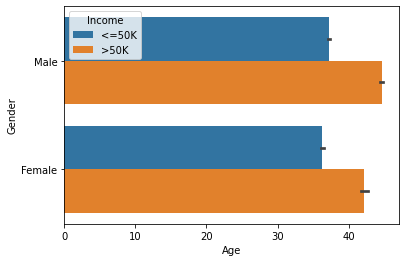

In [217]:
sns.barplot(x='Age',y='Gender',hue='Income',data=df,orient='h')      # displays average age on x-axis

### Q20. Find which age group has maximum no of employees in corporate world.

In [69]:
max_number=pd.crosstab(df.Workclass,cuts)
max_number

Age,"(16.999, 25.0]","(25.0, 40.0]","(40.0, 66.0]","(66.0, 91.0]"
Workclass,,,,
Federal-gov,101,517,791,23
Local-gov,302,1174,1570,90
Never-worked,9,1,0,0
Private,7557,14172,11539,638
Self-emp-inc,84,503,1000,108
Self-emp-not-inc,198,1336,2050,278
State-gov,300,770,874,37
Without-pay,5,3,9,4


In [71]:
max_number.style.highlight_max(axis=1)

Age,"(16.999, 25.0]","(25.0, 40.0]","(40.0, 66.0]","(66.0, 91.0]"
Workclass,,,,
Federal-gov,101,517,791,23
Local-gov,302,1174,1570,90
Never-worked,9,1,0,0
Private,7557,14172,11539,638
Self-emp-inc,84,503,1000,108
Self-emp-not-inc,198,1336,2050,278
State-gov,300,770,874,37
Without-pay,5,3,9,4


#### The highlighted areas denote maximum no of employees of that particular workclass.

### Q21. Find population of each course according to male and female

In [102]:
dfp=pd.crosstab(df['Education'],df['Gender'])
dfp

Gender,Female,Male
Education,,
10th,457,932
11th,650,1162
12th,211,446
1st-4th,61,186
5th-6th,127,382
7th-8th,239,716
9th,220,536
Assoc-acdm,627,974
Assoc-voc,734,1327


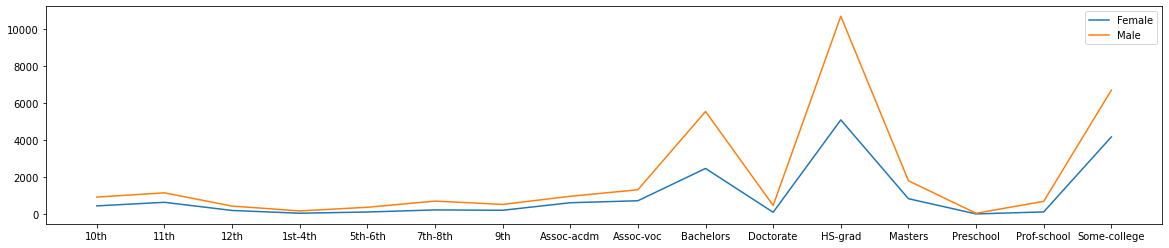

In [42]:
plt.figure(figsize=(20,4))
plt.plot(dfp['Female'],label='Female')
plt.plot(dfp['Male'],label='Male')
plt.legend(loc='best')

### Q22. Find median and outliers of Age w.r.t Educational_Num

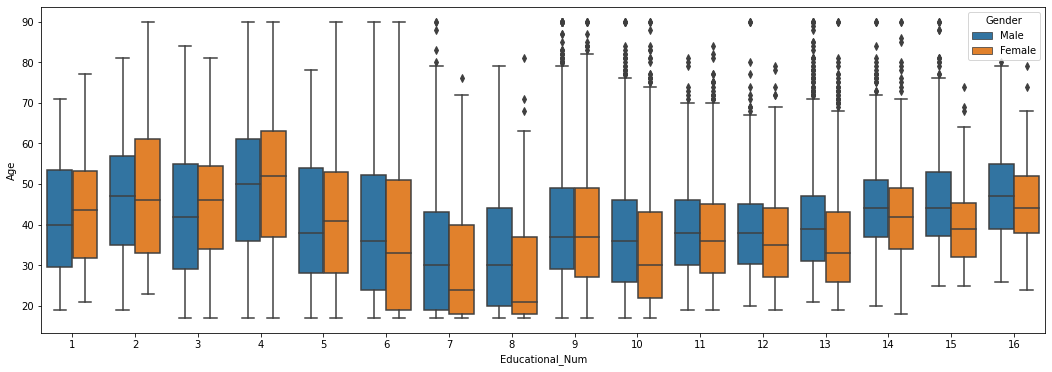

In [33]:
fig_dims=(18,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(x='Educational_Num',y='Age',hue='Gender',data=df,ax=ax)

### Q23. Find median and outliers of Age w.r.t Marital_Status of two different Gender.

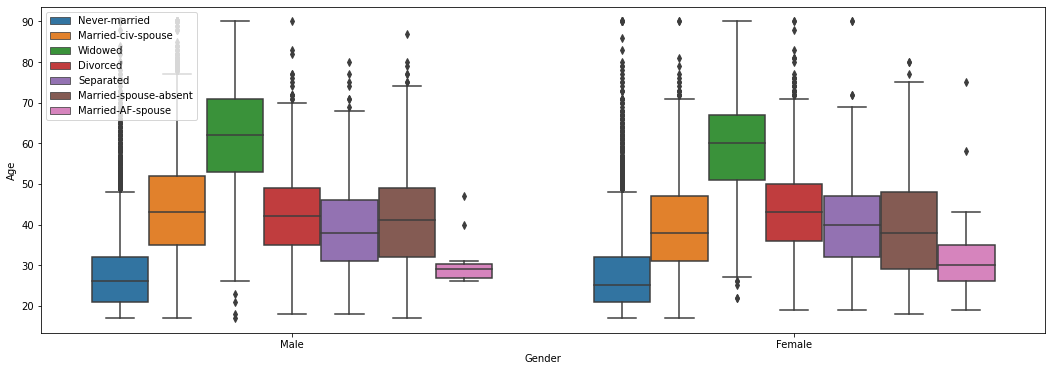

In [36]:
fig_dims=(18,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(x='Gender',y='Age',hue='Marital_Status',data=df,ax=ax)
plt.legend(loc='upper left')

### Q24. Find median and outliers of Age w.r.t Marital_Status of two different Income groups.

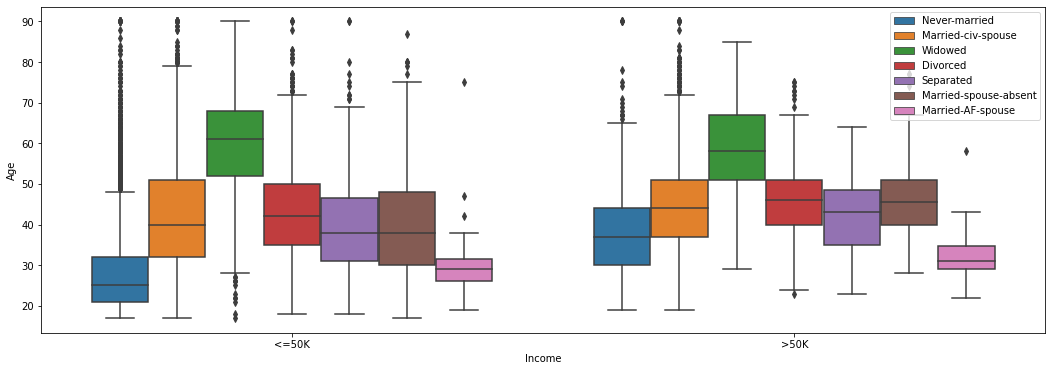

In [43]:
fig_dims=(18,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(x='Income',y='Age',hue='Marital_Status',data=df,ax=ax)
plt.legend(loc='upper right')

### Q25. Combination age w.r.t marital_status seperated by gender and income.

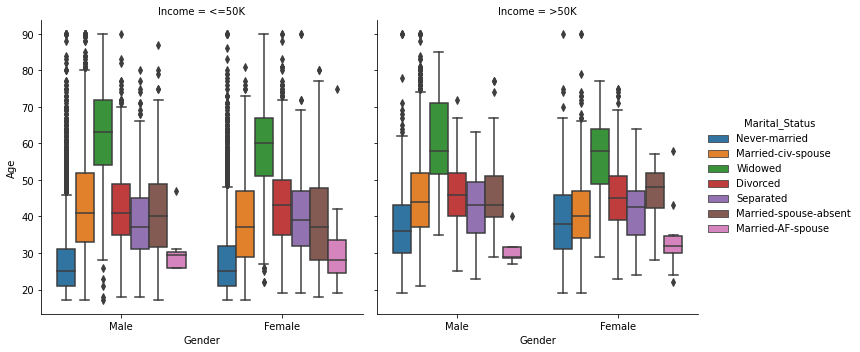

In [45]:
sns.catplot(x='Gender',y='Age',hue='Marital_Status',col='Income',kind='box',data=df)

### Q26. Find which gender puts more effort w.r.t each Workclass 

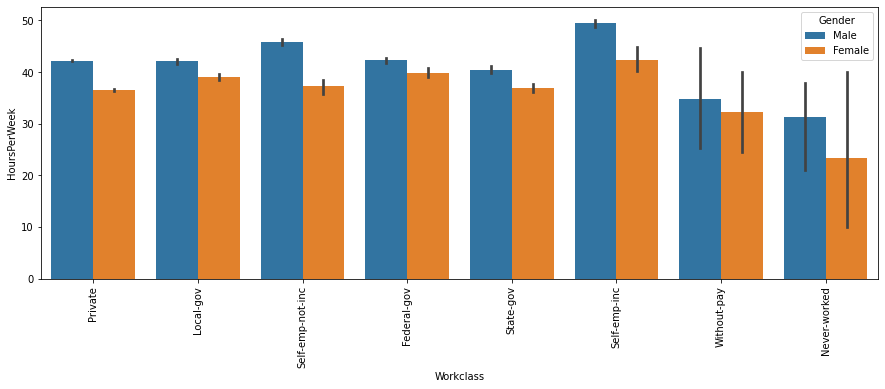

In [47]:
plt.figure(figsize=(15,5))
sns.barplot('Workclass','HoursPerWeek',hue='Gender',data=df)
plt.xticks(rotation=90);

##### Men work more number of hours than women.

### Q27. Plot bargraph of number of perple working in each Workclass.

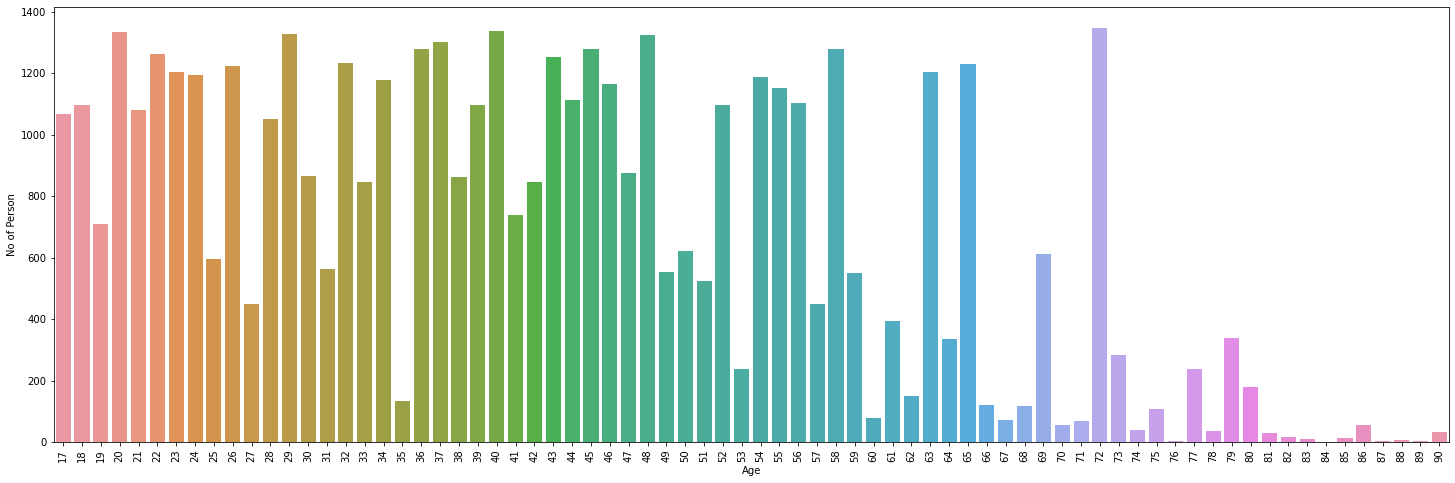

In [104]:
plt.figure(figsize=(25,8))
sns.barplot(df.Age.unique(),df.groupby("Age")['HoursPerWeek'].count())
plt.xlabel('Age')
plt.ylabel('No of Person')
plt.xticks(rotation=90);

### Inference: Mostly young people and middle age people are more in number

### Q28. Plot a graph denoting the relationship between Educational_Num and Marital_Status

Text(0.5, 0, 'Marital_Status')

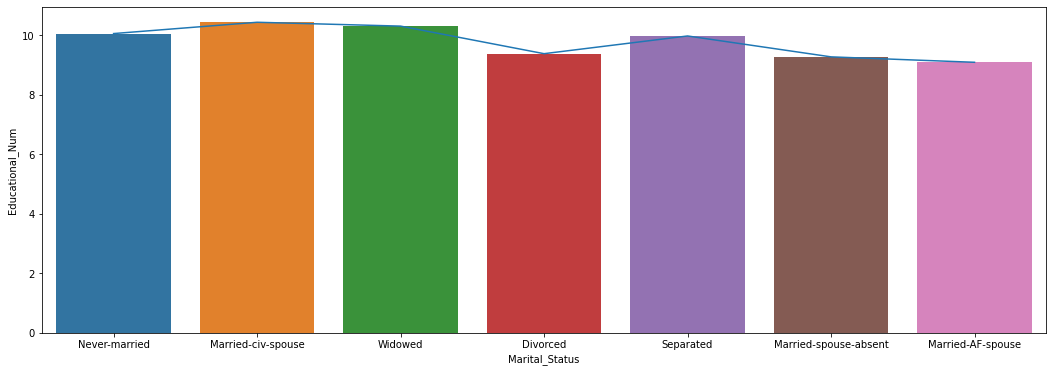

In [53]:
plt.figure(figsize=(18,6))
plt.plot(df['Marital_Status'].unique(),df.groupby('Marital_Status')['Educational_Num'].mean())
sns.barplot(df['Marital_Status'].unique(),df.groupby('Marital_Status')['Educational_Num'].mean());
plt.xlabel('Marital_Status')

### Inference: Roughly we can say considering age also that more married peole has highest level of education and never married are still young population. But this graph shows us that there is no correlation between educational level and marital-status

### Q29. Show graphically the realtion between educational number and no of hours of working

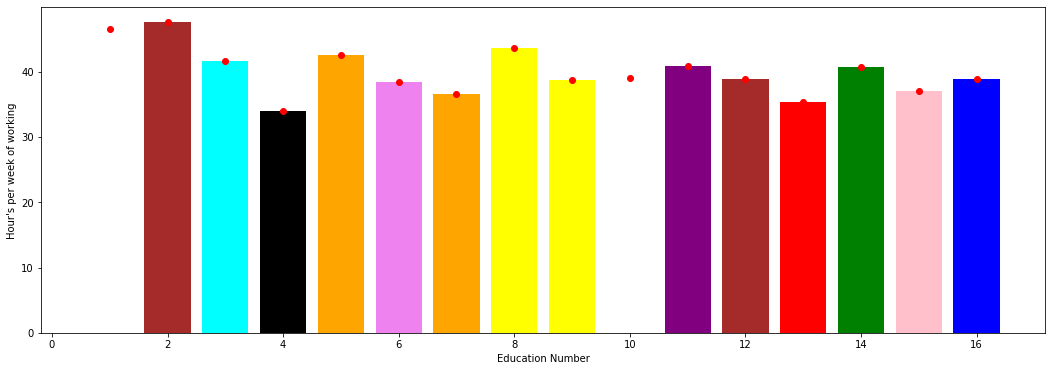

In [207]:
plt.figure(figsize=(18,6))
plt.xlabel('Education Number')
plt.ylabel("Hour's per week of working")
plt.plot(df['Educational_Num'].unique(),df.groupby('Educational_Num')['HoursPerWeek'].mean(),'or')
plt.bar(df['Educational_Num'].unique(),df.groupby('Educational_Num')['HoursPerWeek'].mean(),color=['orange','yellow','brown','white','violet','pink','black', 'red', 'green', 'blue', 'cyan','purple','orange','yellow','brown','white']);

### Inference: This plot shows as education level increases working hours will decrease as lowest level of education demands more manual work

### Q30.Plot the graph to compare the income status of each relationship

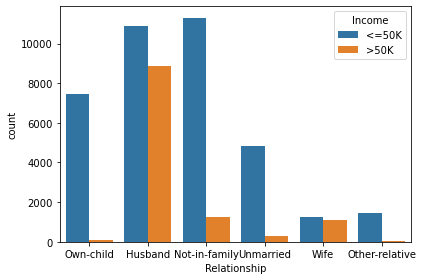

In [209]:
plt.figure()
sns.countplot(x='Relationship',data=df,hue='Income')
plt.tight_layout()

### Inference: Here wives number is less but their number is high in >50K than <50K which is exceptional. The possible reason for their low number is that after marriage mostly wives are responsible for household works. Other than husband and wives, other relationships has huge difference in income category

# Level_3: Questions with Objectives

###  Q31. To understand the dependency of target(income) on Education level

In [189]:
temp=pd.crosstab(df['Education'],df['Income'],margins=True)
temp['%<=50K']=(temp['<=50K']/temp['All'])*100
temp['%>50K']=(temp['>50K']/temp['All'])*100
temp

Income,<=50K,>50K,All,%<=50K,%>50K
Education,,,,,
10th,1302,87,1389,93.736501,6.263499
11th,1720,92,1812,94.922737,5.077263
12th,609,48,657,92.694064,7.305936
1st-4th,239,8,247,96.761134,3.238866
5th-6th,482,27,509,94.695481,5.304519
7th-8th,893,62,955,93.507853,6.492147
9th,715,41,756,94.576720,5.423280
Assoc-acdm,1188,413,1601,74.203623,25.796377
Assoc-voc,1539,522,2061,74.672489,25.327511


####  checking which values can be compared based on their percentage 

##### We can infer that as education level of an individual increases his earning capacity also increases thus 72% of population who holds doctorate degree earn more than 50K per annum and only 4-7% of those who have completed their education till school can earn more than 50K per annum

### Q32. Compute the salary of employes who are working more than 40 hours/week.
#### The aim of this question is to know whether the employes who are working more than 40 hours/week make more money or not.

In [198]:
more_work = df.query("HoursPerWeek>40")   # DataFrame of employes earning more than 40 hours/week 
more_work

,Age,Workclass,Education,Educational_Num,Marital_Status,Status_Number,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,Native_Country,Income
1,38,Private,HS-grad,9,Married-civ-spouse,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
14,48,Private,HS-grad,9,Married-civ-spouse,1,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
15,43,Private,Masters,14,Married-civ-spouse,1,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19,40,Private,Doctorate,16,Married-civ-spouse,1,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
20,34,Private,Bachelors,13,Married-civ-spouse,1,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48819,38,Private,Bachelors,13,Divorced,3,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48824,45,Local-gov,Assoc-acdm,12,Divorced,3,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
48829,65,Self-emp-not-inc,Prof-school,15,Never-married,0,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48831,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,1,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [199]:
salary = pd.pivot_table(more_work, index=[ more_work.Workclass, more_work.Income ],
    aggfunc = { 'HoursPerWeek' : ['min','mean','max','count' ]} )

In [200]:
salary

HoursPerWeek                       
                               count   max       mean   min
Workclass        Income                                    
Federal-gov      <=50K         137.0  99.0  53.445255  41.0
                 >50K          177.0  80.0  52.254237  41.0
Local-gov        <=50K         491.0  99.0  52.431772  41.0
                 >50K          357.0  99.0  53.064426  41.0
Private          <=50K        5892.0  99.0  52.015954  41.0
                 >50K         3655.0  99.0  52.471956  41.0
Self-emp-inc     <=50K         402.0  99.0  57.194030  41.0
                 >50K          643.0  99.0  56.225505  41.0
Self-emp-not-inc <=50K        1219.0  99.0  58.035275  42.0
                 >50K          633.0  99.0  56.189573  42.0
State-gov        <=50K         207.0  99.0  54.367150  42.0
                 >50K          206.0  99.0  53.087379  41.0
Without-pay      <=50K           5.0  65.0  53.000000  45.0
                 >50K            1.0  60.0  60.000000  60.0

In [201]:
salary1 = pd.pivot_table(more_work, index=[ more_work.Education, more_work.Income ],
aggfunc = {'Education':'count'})
salary1

Education
Education    Income           
10th         <=50K         207
             >50K           37
11th         <=50K         230
             >50K           37
12th         <=50K          85
             >50K           18
1st-4th      <=50K          43
             >50K            5
5th-6th      <=50K          77
             >50K            9
7th-8th      <=50K         187
             >50K           30
9th          <=50K         133
             >50K           21
Assoc-acdm   <=50K         321
             >50K          196
Assoc-voc    <=50K         386
             >50K          222
Bachelors    <=50K        1448
             >50K         1734
Doctorate    <=50K          69
             >50K          258
HS-grad      <=50K        3043
             >50K         1054
Masters      <=50K         412
             >50K          792
Preschool    <=50K           9
Prof-school  <=50K          87
             >50K          408
Some-college <=50K        1873
             >50K          921

### As we can observe from the result that there are people who are working more and still earning less than 50k. So we cannot say that more working hours means more money.

### Q33. Find employees earning more than 50K and are not whites.

In [78]:
df.query("Income=='>50K'").Income.count()

11687

In [79]:
df.query("Race!='White' & Income=='>50K'")

,Age,Workclass,Education,Educational_Num,Marital_Status,Status_Number,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,Native_Country,Income
3,44,Private,Some-college,10,Married-civ-spouse,1,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
19,40,Private,Doctorate,16,Married-civ-spouse,1,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
30,46,State-gov,Some-college,10,Married-civ-spouse,1,Exec-managerial,Husband,Black,Male,7688,0,38,United-States,>50K
319,68,Private,HS-grad,9,Married-civ-spouse,1,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,>50K
346,39,Private,HS-grad,9,Divorced,3,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48535,31,Private,Some-college,10,Married-civ-spouse,1,Other-service,Husband,Asian-Pac-Islander,Male,0,1485,55,NaN,>50K
48651,53,Self-emp-not-inc,Prof-school,15,Never-married,0,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,27828,0,40,Philippines,>50K
48738,33,Private,Masters,14,Married-civ-spouse,1,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,>50K
48814,54,Private,Bachelors,13,Married-civ-spouse,1,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K


In [80]:
prcnt=(1080/11600)*100
prcnt

9.310344827586208

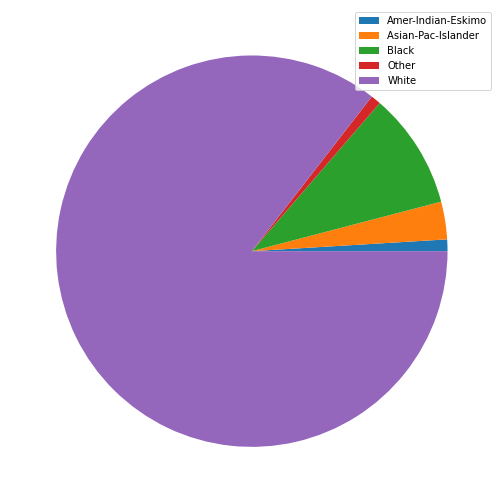

In [81]:
plt.figure(figsize=(9,9))
plt.pie(x=df.groupby('Race')['Age'].count())
plt.legend(['Amer-Indian-Eskimo','Asian-Pac-Islander ','Black','Other','White'],loc='upper right')

##### As we can observe that there are around 11600 employees who are earning more than 50K but only 1080 are not whites. So if you are not white your chances to earn 50K+ in America is just 9%.
##### Hence, we conclude that after so many years there is still a concept of bigotry in Americans' mind. They are full of prejudice.

### Q34. Take in data of Unmarried, Not-in-Family, and Own-Child and performing some operations on them.
#### a) Group the data with Age and describe your dataset.

In [82]:
ip = df.query("Relationship=='Unmarried' | Relationship=='Own-child' | Relationship=='Not-in-family'")

In [83]:
ip['Age'].groupby(ip['Relationship']).describe()

,count,mean,std,min,25%,50%,75%,max
Relationship,,,,,,,,
Not-in-family,12583.0,38.421601,13.989086,17.0,27.0,35.0,47.0,90.0
Own-child,7581.0,24.794090,8.113717,17.0,19.0,22.0,27.0,90.0
Unmarried,5125.0,40.312195,11.683326,17.0,32.0,39.0,48.0,90.0


#####  People not in family and unmarried lie in similar age groups(40s) while own child are generally young guys
##### It means unmarried people and not-in-family are living alone and not considered as child even if they are young

### b) Find which occupation they are engaged and which have most of them.

In [84]:
ip['Occupation'].groupby(ip['Relationship']).value_counts()

Relationship   Occupation       
Not-in-family  Prof-specialty       1908
               Adm-clerical         1730
               Exec-managerial      1564
               Other-service        1465
               Sales                1344
               Craft-repair         1217
               Machine-op-inspct     720
               Transport-moving      464
               Handlers-cleaners     458
               Tech-support          447
               Farming-fishing       277
               Protective-serv       220
               Priv-house-serv        97
               Armed-Forces            5
Own-child      Other-service        1305
               Adm-clerical         1144
               Sales                1058
               Handlers-cleaners     618
               Craft-repair          587
               Prof-specialty        469
               Machine-op-inspct     401
               Exec-managerial       349
               Transport-moving      234
               Farming-f

### c) Use crosstab and find the relationship (in %age) between Income and Relationship attribute.

In [85]:
pd.crosstab(ip['Relationship'],ip['Income'])

Income,<=50K,>50K
Relationship,,
Not-in-family,11307,1276
Own-child,7470,111
Unmarried,4816,309


In [86]:
ip_per = pd.crosstab(ip['Relationship'],ip['Income'])
ip_per['sum']=ip_per['<=50K']+ip_per['>50K']
ip_per['<=50K%']=(ip_per['<=50K']/ip_per['sum'])*100
ip_per['>50K%']=(ip_per['>50K']/ip_per['sum'])*100
ip_per

Income,<=50K,>50K,sum,<=50K%,>50K%
Relationship,,,,,
Not-in-family,11307,1276,12583,89.859334,10.140666
Own-child,7470,111,7581,98.535813,1.464187
Unmarried,4816,309,5125,93.970732,6.029268


In [87]:
bins=[17,25,40,66,91]
group_names=['Youth','Adult','Senior','SuperSenior']
cuts=pd.cut(df.Age,bins,include_lowest=True,labels=group_names)
pd.get_dummies(cuts).sample(10)

,Youth,Adult,Senior,SuperSenior
11201,0,0,1,0
3024,0,1,0,0
31751,0,0,1,0
13405,0,0,1,0
3696,0,0,1,0
14137,0,0,1,0
3660,0,0,1,0
10332,0,0,1,0
9760,0,0,1,0
19600,1,0,0,0


In [88]:
df_count=pd.crosstab([df['Education'],df['Marital_Status']],df['Income'])
df_count

Income                              <=50K  >50K
Education    Marital_Status                    
10th         Divorced                 170     2
             Married-AF-spouse          1     0
             Married-civ-spouse       446    79
             Married-spouse-absent     22     0
             Never-married            521     4
...                                   ...   ...
Some-college Married-civ-spouse      2356  1823
             Married-spouse-absent    100     9
             Never-married           4366    87
             Separated                293    24
             Widowed                  237    14

[104 rows x 2 columns]

### Q35. Getting average population based on education level and marital-status
#### This calculates average number of people who earn more than 50K and less than 50K and averaged on marital-status [Ex: for education level Prof-school, 4 to 5 people in each of values of marital-status earn less than 50K and 14 people earn more than 50K]

In [90]:
for i in list(df['Education'].unique()):
    print('Education: ',i)
    print(df_count.loc[(i),:].mean())
    print('____________________________')

Education:  11th
Income
<=50K    286.666667
>50K      15.333333
dtype: float64
____________________________
Education:  HS-grad
Income
<=50K    1897.285714
>50K      357.571429
dtype: float64
____________________________
Education:  Assoc-acdm
Income
<=50K    169.714286
>50K      59.000000
dtype: float64
____________________________
Education:  Some-college
Income
<=50K    1259.285714
>50K      294.714286
dtype: float64
____________________________
Education:  10th
Income
<=50K    186.000000
>50K      12.428571
dtype: float64
____________________________
Education:  Prof-school
Income
<=50K    31.000000
>50K     88.142857
dtype: float64
____________________________
Education:  7th-8th
Income
<=50K    148.833333
>50K      10.333333
dtype: float64
____________________________
Education:  Bachelors
Income
<=50K    673.142857
>50K     473.285714
dtype: float64
____________________________
Education:  Masters
Income
<=50K    199.666667
>50K     243.166667
dtype: float64
____________________

### Inference; In Prof-School and Doctorate degrees Average number of people earning more than 50K is greater than average number of people earning less than 50K. For the remaining education levels it is vice-versa]

### Q36. Aim is to group the population based on education, marital-status and income

In [106]:
lst=[]
for(k1,k2,k3),group in df.groupby(['Education','Marital_Status','Income']):
    lst.append((k1,k2,k3))
    lst.append(group)
df1=pd.DataFrame(lst)
lst[:4]  #displaying only few rows

[('10th', 'Divorced', '<=50K'),
        Age Workclass Education  Educational_Num Marital_Status  Status_Number  \
 293     42   Private      10th                6       Divorced              3   
 369     26   Private      10th                6       Divorced              3   
 551     26   Private      10th                6       Divorced              3   
 791     57   Private      10th                6       Divorced              3   
 1011    52   Private      10th                6       Divorced              3   
 ...    ...       ...       ...              ...            ...            ...   
 47875   56       NaN      10th                6       Divorced              3   
 48474   68   Private      10th                6       Divorced              3   
 48609   31   Private      10th                6       Divorced              3   
 48634   36   Private      10th                6       Divorced              3   
 48789   45   Private      10th                6       Divorced   

### Q37. To know the age group based on marital-status

In [112]:
bins=[16.99,25,40,66,91]
cuts=pd.cut(df.Age,bins,labels=['Youth','Adult','Senior','Super-Senior'],right=True,include_lowest=True)
table=pd.pivot_table(df,index=df['Marital_Status'],columns=[cuts,df.Income],values='Income',aggfunc='count')
table

Age                     Youth          Adult          Senior          \
Income                  <=50K   >50K   <=50K    >50K   <=50K    >50K   
Marital_Status                                                         
Divorced                192.0    3.0  2448.0   185.0  3195.0   474.0   
Married-AF-spouse         4.0    2.0    16.0    10.0     2.0     2.0   
Married-civ-spouse      890.0  107.0  5364.0  3750.0  5522.0  5888.0   
Married-spouse-absent    74.0    NaN   238.0    18.0   239.0    36.0   
Never-married          8175.0   54.0  5711.0   422.0  1415.0   242.0   
Separated               116.0    3.0   699.0    40.0   599.0    56.0   
Widowed                   7.0    NaN    96.0     7.0   888.0    87.0   

Age                   Super-Senior         
Income                       <=50K   >50K  
Marital_Status                             
Divorced                     127.0    9.0  
Married-AF-spouse              1.0    NaN  
Married-civ-spouse           619.0  239.0  
Married-spouse-absent         19.0    4.0  
Never-married                 83.0   15.0  
Separated                     17.0    NaN  
Widowed                      399.0   34.0

### Inference: The 77% percent of never married still belong to the age group of youth and young adult.

### Q38. Check relation between native country and educational number


In [24]:
h1=df.pivot_table(index='Native_Country',columns='Gender',values='Educational_Num')
print(h1)

Gender                         Female       Male
Native_Country                                  
Cambodia                     8.666667   9.590909
Canada                      10.460317  10.815126
China                       11.000000  11.359551
Columbia                     8.781250   9.547170
Cuba                         9.760000   9.181818
Dominican-Republic           6.854167   7.727273
Ecuador                      8.625000   9.586207
El-Salvador                  6.037037   7.089109
England                     10.377778  11.512195
France                      11.285714  12.416667
Germany                     10.770115  11.042017
Greece                       9.777778   9.750000
Guatemala                    6.000000   6.435484
Haiti                        8.451613   8.590909
Holand-Netherlands          10.000000        NaN
Honduras                     8.818182   7.777778
Hong                         9.545455  10.947368
Hungary                     11.142857  10.833333
India               

In [25]:
h2=h1.replace(np.nan,0)
print(h2)

Gender                         Female       Male
Native_Country                                  
Cambodia                     8.666667   9.590909
Canada                      10.460317  10.815126
China                       11.000000  11.359551
Columbia                     8.781250   9.547170
Cuba                         9.760000   9.181818
Dominican-Republic           6.854167   7.727273
Ecuador                      8.625000   9.586207
El-Salvador                  6.037037   7.089109
England                     10.377778  11.512195
France                      11.285714  12.416667
Germany                     10.770115  11.042017
Greece                       9.777778   9.750000
Guatemala                    6.000000   6.435484
Haiti                        8.451613   8.590909
Holand-Netherlands          10.000000   0.000000
Honduras                     8.818182   7.777778
Hong                         9.545455  10.947368
Hungary                     11.142857  10.833333
India               

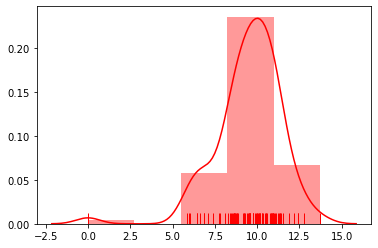

In [26]:
sns.distplot(h2,bins=5,color='r',rug=True)

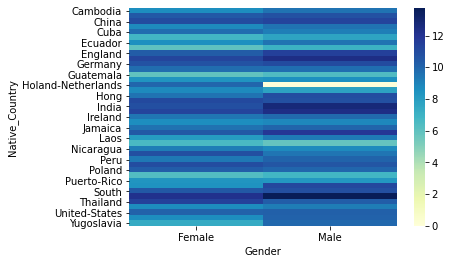

In [27]:
sns.heatmap(h2,cmap="YlGnBu")

In [28]:
h2['Female'].sort_values()

Native_Country
Guatemala                      6.000000
El-Salvador                    6.037037
Portugal                       6.428571
Mexico                         6.627907
Dominican-Republic             6.854167
Yugoslavia                     7.400000
Laos                           8.111111
Puerto-Rico                    8.373333
Haiti                          8.451613
Scotland                       8.500000
Ecuador                        8.625000
Vietnam                        8.633333
Italy                          8.642857
Cambodia                       8.666667
Trinadad&Tobago                8.714286
Columbia                       8.781250
Honduras                       8.818182
Nicaragua                      9.227273
Peru                           9.388889
Ireland                        9.444444
Hong                           9.545455
Jamaica                        9.603448
Cuba                           9.760000
Greece                         9.777778
Holand-Netherlands       

### Inference: For women, the educational number is highest for ppl whose native country is Taiwan. Interestingly, for ppl who are from USA, the avg educational number is not in the top 10 countries, but the results may vary depending on the sample size. However, it could also indicate that immigrants coming into the country have higher qualifications as compared to home citizens.

In [29]:
h2['Male'].sort_values()

Native_Country
Holand-Netherlands             0.000000
Mexico                         5.850543
Guatemala                      6.435484
Portugal                       6.849057
El-Salvador                    7.089109
Dominican-Republic             7.727273
Honduras                       7.777778
Puerto-Rico                    8.302752
Haiti                          8.590909
Nicaragua                      8.814815
Italy                          8.844156
Cuba                           9.181818
Trinadad&Tobago                9.230769
Laos                           9.285714
Outlying-US(Guam-USVI-etc)     9.500000
Columbia                       9.547170
Ecuador                        9.586207
Cambodia                       9.590909
Greece                         9.750000
Ireland                        9.892857
Yugoslavia                     9.944444
Poland                         9.984127
Jamaica                       10.062500
Peru                          10.107143
Vietnam                  

### Similar conclusion for males, with Taiwan and France in the top 3 again, along with India. This is possibly in concurrence with trends of Indian male engineers going to USA for better opporutnities.

### Q39. Check ratio of both income brackets for ppl from Taiwan and France


In [32]:
df['Income'][(df['Native_Country']=='Taiwan') & (df['Income']=='<=50K')].count()


39

In [31]:
df['Income'][(df['Native_Country']=='Taiwan') & (df['Income']=='>50K')].count()

26

### we can see that the percentage of people earning >50K from Taiwan is 26/65 = 40%. 

In [33]:
df['Income'][(df['Native_Country']=='France') & (df['Income']=='<=50K')].count()


22

In [34]:
df['Income'][(df['Native_Country']=='France') & (df['Income']=='>50K')].count()

16

### Similarly for France, the percentage is 16/38 * 100=42%

### Q40. Check the relation between income and race and their average age

In [215]:
h=df.pivot_table(index='Income',columns='Race',values='Age')
h

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Income,,,,,
<=50K,36.127711,36.219820,37.051712,32.685393,36.92945
>50K,40.963636,42.305623,44.192580,40.580000,44.39012


### The graph below show's Race vs highest education received by each person of each race

Text(0.5, 0, 'Race')

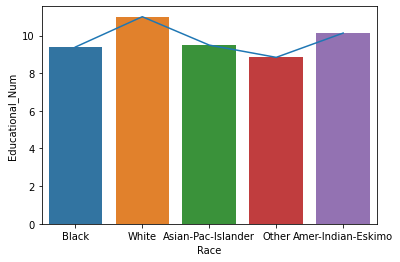

In [212]:
plt.plot(df['Race'].unique(),df.groupby('Race')['Educational_Num'].mean())
sns.barplot(df['Race'].unique(),df.groupby('Race')['Educational_Num'].mean());
plt.xlabel('Race')

### Inference: Here as we can see mostly white receive the highest level of education 

### Q41. Find the most occuring education for each profession

In [195]:
occed=pd.crosstab(df['Occupation'],df['Education'])
occed

Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Occupation,,,,,,,,,,,,,,,,
Adm-clerical,59,100,52,6,8,20,20,281,269,765,6,2047,105,3,12,1858
Armed-Forces,0,0,1,0,0,0,0,0,1,1,0,5,2,0,1,4
Craft-repair,239,270,92,28,71,172,144,167,375,332,4,2911,34,6,9,1258
Exec-managerial,42,51,18,6,6,28,23,240,234,2025,84,1192,779,1,69,1288
Farming-fishing,71,67,29,33,52,106,44,25,85,113,1,573,14,17,7,253
Handlers-cleaners,108,177,55,26,59,66,72,34,43,79,0,943,5,5,0,400
Machine-op-inspct,152,153,61,36,95,129,102,51,95,99,1,1531,12,12,1,492
Other-service,280,368,129,55,98,149,142,110,160,259,2,1936,35,22,7,1171
Priv-house-serv,8,18,8,14,20,17,16,3,5,12,1,91,1,2,0,26


In [194]:
occed.idxmax(axis=1).value_counts()

HS-grad         11
Bachelors        2
Some-college     1
dtype: int64

### Inference: Here we can say that in 80% of professions, people are mostly having education of HS-grad. So to get into profession, chances will become better if you have atleast HS-grad degree

### Q.42 Compare marital-status and income.

In [203]:
temp1=pd.crosstab(df['Marital_Status'],df['Income'],margins=True)
temp1['%<=50K']=(temp1['<=50K']/temp1['All'])*100
temp1['%>50K']=(temp1['>50K']/temp1['All'])*100
temp1

Income,<=50K,>50K,All,%<=50K,%>50K
Marital_Status,,,,,
Divorced,5962,671,6633,89.883914,10.116086
Married-AF-spouse,23,14,37,62.162162,37.837838
Married-civ-spouse,12395,9984,22379,55.386747,44.613253
Married-spouse-absent,570,58,628,90.764331,9.235669
Never-married,15384,733,16117,95.452007,4.547993
Separated,1431,99,1530,93.529412,6.470588
Widowed,1390,128,1518,91.567852,8.432148
All,37155,11687,48842,76.071823,23.928177


### Inference: As seen population of married is more and 44.61% of married people with civilan spouses can earn more than 50K and only 4.54% of never married i.e single people can earn more than 50K per annum. This infers that majority of the population who are well settled are married and never married can be assumed to be young population.